# Import

In [71]:
from lab.plot import Plot
from lab.data import Data
import lab.mmath as mm
from lab.arr import Array
import lab.linfit as lf
import lab.constants as const
from lab.utils import uf, totex
from lab.unit import unit as u
import matplotlib.pyplot as plt
import numpy as np
print("Import done!")

Import done!


# Read data

In [72]:
phi0 = uf(179 + 56 / 60 + 37 / 3600, 5 / 3600, "deg")

In [73]:
d_1 = Data("../data/-1.csv")
d_1["phi"] -= phi0
d1 = Data("../data/1.csv")
d1["phi"] -= phi0
d1["la"] *= -1
d1["sin"] = mm.sin(d1["phi"])
d_1["sin"] = mm.sin(d_1["phi"])
d1.head(5)

,la,phi,sin
0,-577.00+/-0.10 nanometer,-0.297496+/-0.000034 dimensionless,-0.293127+/-0.000033 dimensionless
1,-579.10+/-0.10 nanometer,-0.295722+/-0.000034 dimensionless,-0.291430+/-0.000033 dimensionless
2,-546.10+/-0.10 nanometer,-0.278792+/-0.000034 dimensionless,-0.275195+/-0.000033 dimensionless
3,-491.60+/-0.10 nanometer,-0.249892+/-0.000034 dimensionless,-0.247300+/-0.000033 dimensionless
4,-435.80+/-0.10 nanometer,-0.247517+/-0.000034 dimensionless,-0.244997+/-0.000033 dimensionless


In [74]:
d_1.head()

,la,phi,sin
0,577.00+/-0.10 nanometer,0.293739+/-0.000034 dimensionless,0.289533+/-0.000033 dimensionless
1,579.10+/-0.10 nanometer,0.292692+/-0.000034 dimensionless,0.288531+/-0.000033 dimensionless
2,546.10+/-0.10 nanometer,0.276286+/-0.000034 dimensionless,0.272784+/-0.000033 dimensionless
3,491.60+/-0.10 nanometer,0.250610+/-0.000034 dimensionless,0.247995+/-0.000033 dimensionless
4,435.80+/-0.10 nanometer,0.245083+/-0.000034 dimensionless,0.242637+/-0.000033 dimensionless


(0.0005131416789941006+/-6.408365649543555e-06 <Unit('1 / nanometer')>,
 -0.0007611195287354066+/-0.003275678092107623 <Unit('dimensionless')>)

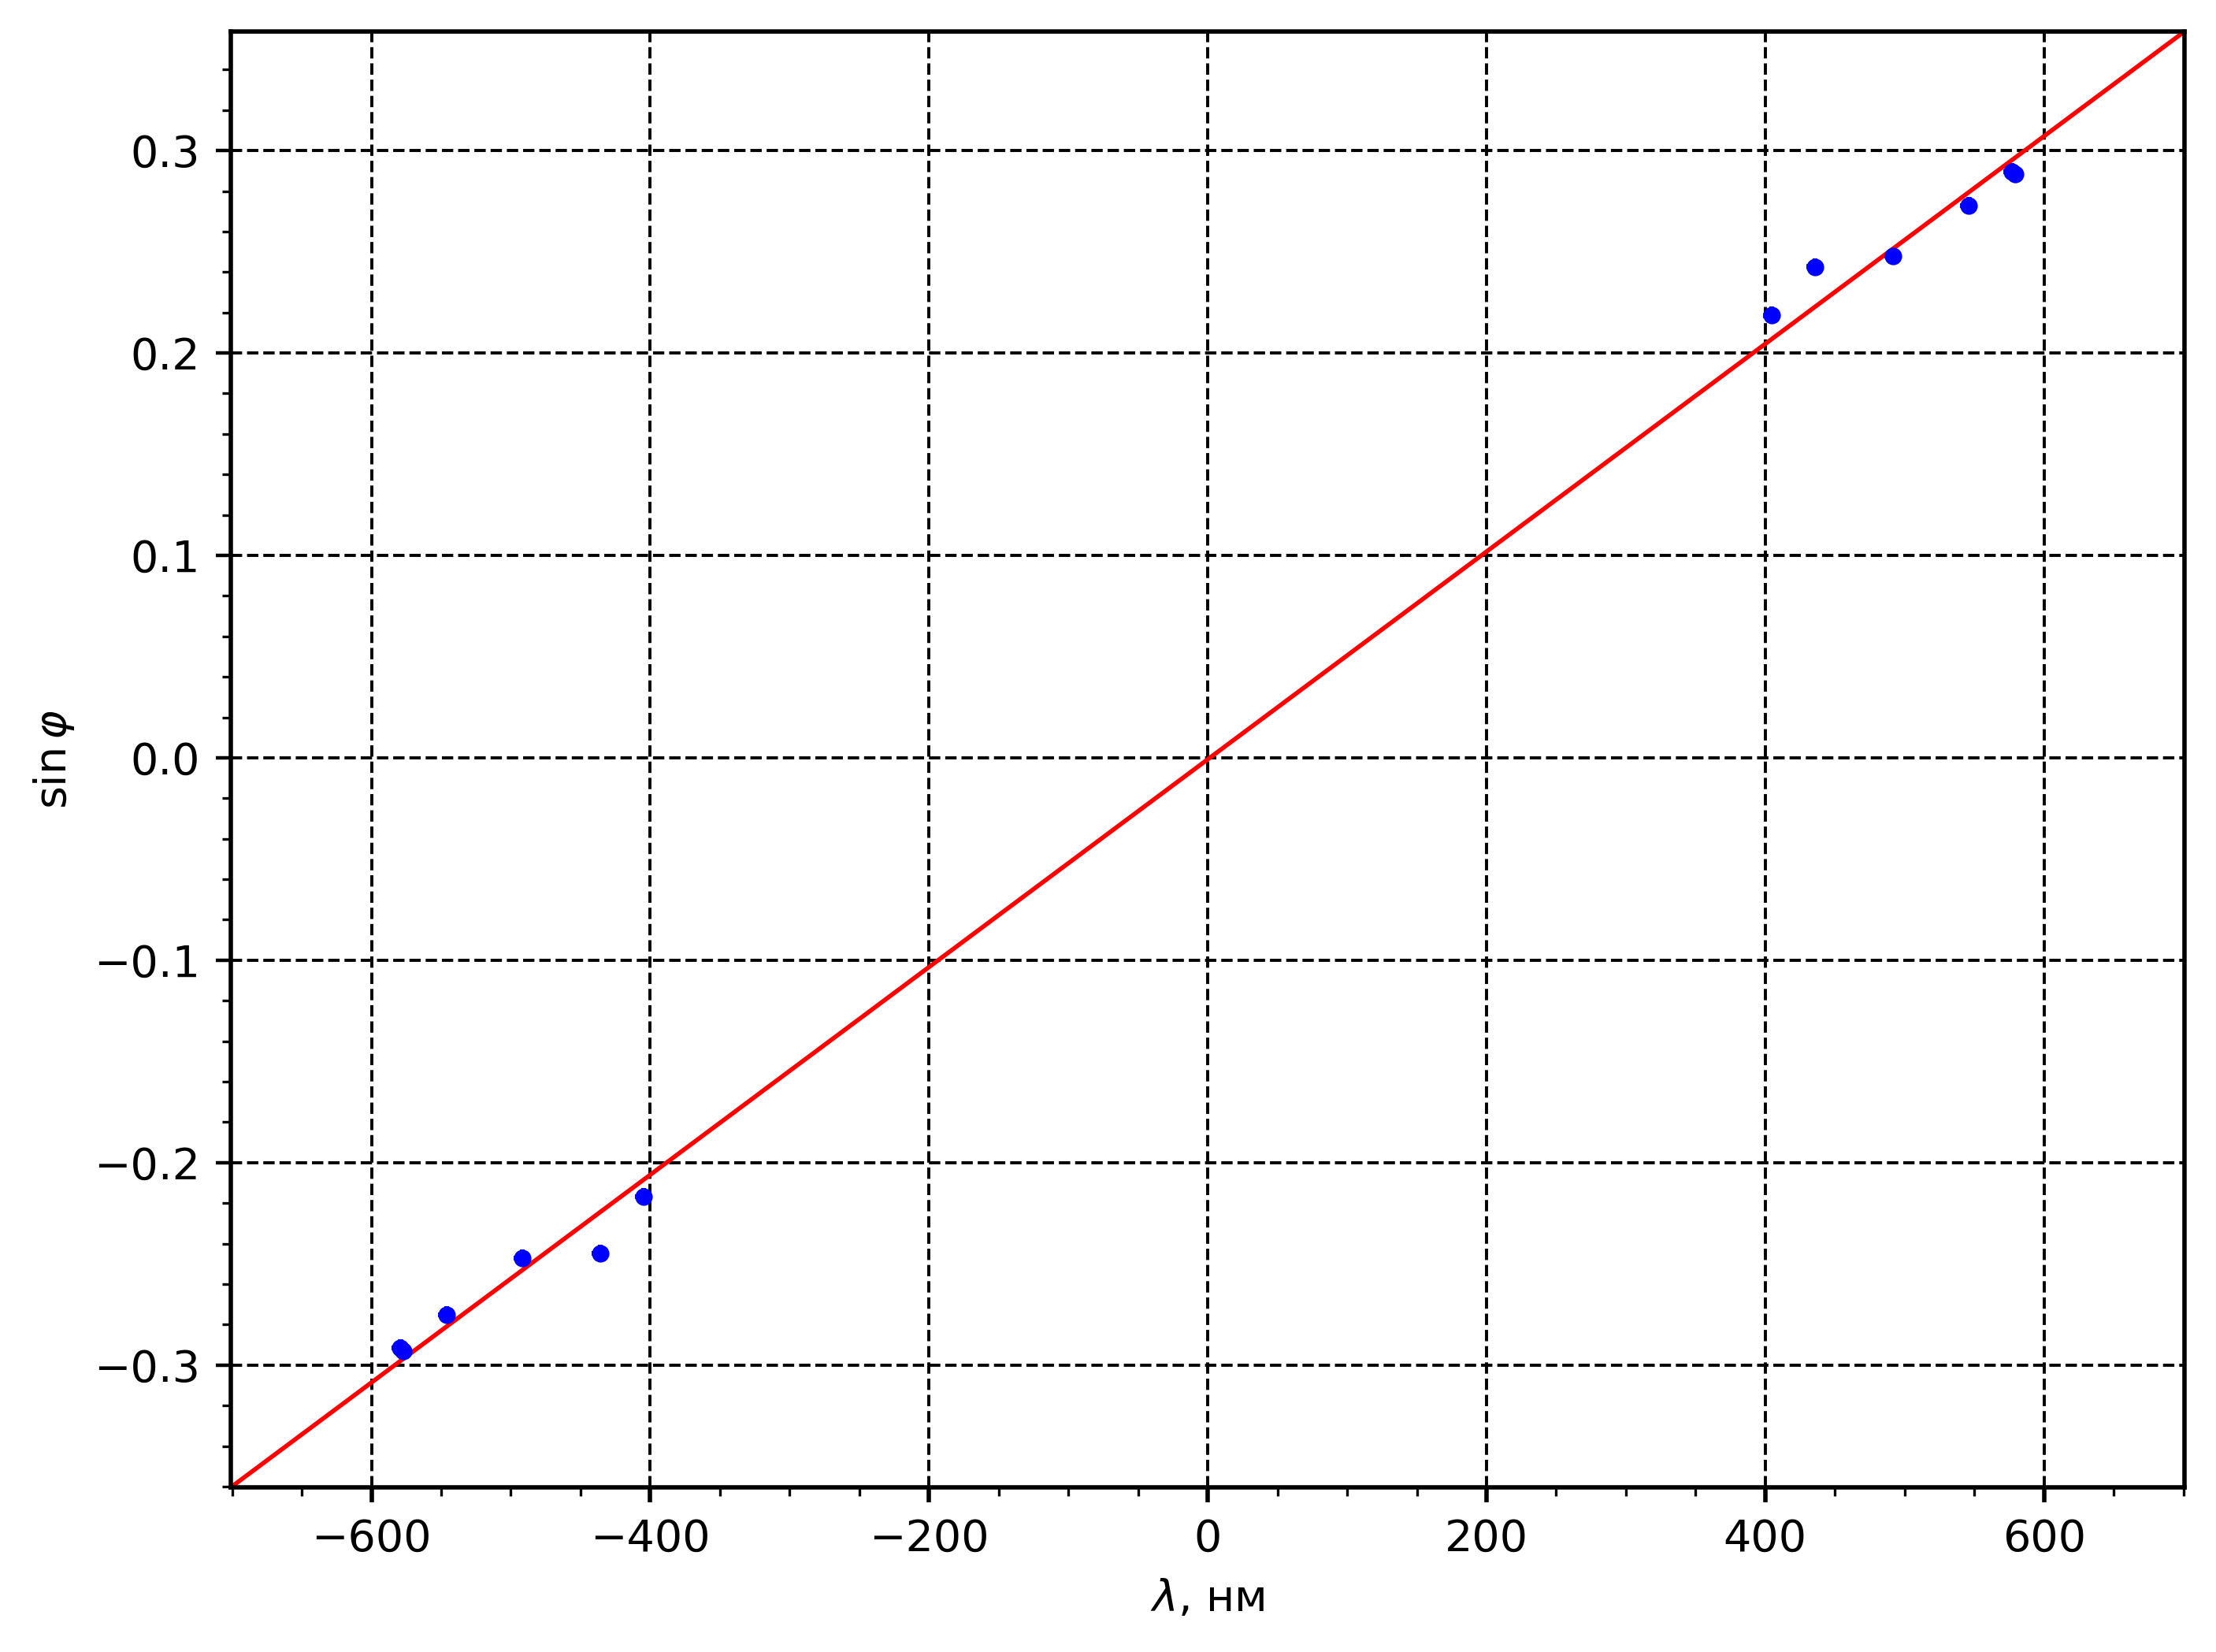

In [75]:
p = Plot(xl="$\\lambda$", yl="$\\sin\\varphi$")
x, y = Array.concat(*d_1["la"], *d1["la"]), Array.concat(*d_1["sin"], *d1["sin"])
k, b = lf.chi2(x, y)
p.plot(x, y, fmt=".")
p.line(k, b, color="red")
p.save("../img/p1.png")
k, b

In [76]:
kk = 1 / k
kk.ito("micrometer")
kk

1.948779529973625+/-0.024337317176997796 <Unit('micrometer')>

In [77]:
j2 = uf((38 / 60 + 35 / 3600 - 29 / 60 + 9 / 3600), 10 / 3600, "deg").to("rad") / uf(2.1, 0.1, "nm")
j1 = uf((1.0 - 55 / 60 - 54 / 3600), 10 / 3600, "deg").to("rad") / uf(2.1, 0.1, "nm")
j_1 = -uf((45 / 60 + 25 / 3600 - 42 / 60 + 49 / 3600), 10 / 3600, "deg").to("rad") / uf(2.1, 0.1, "nm")

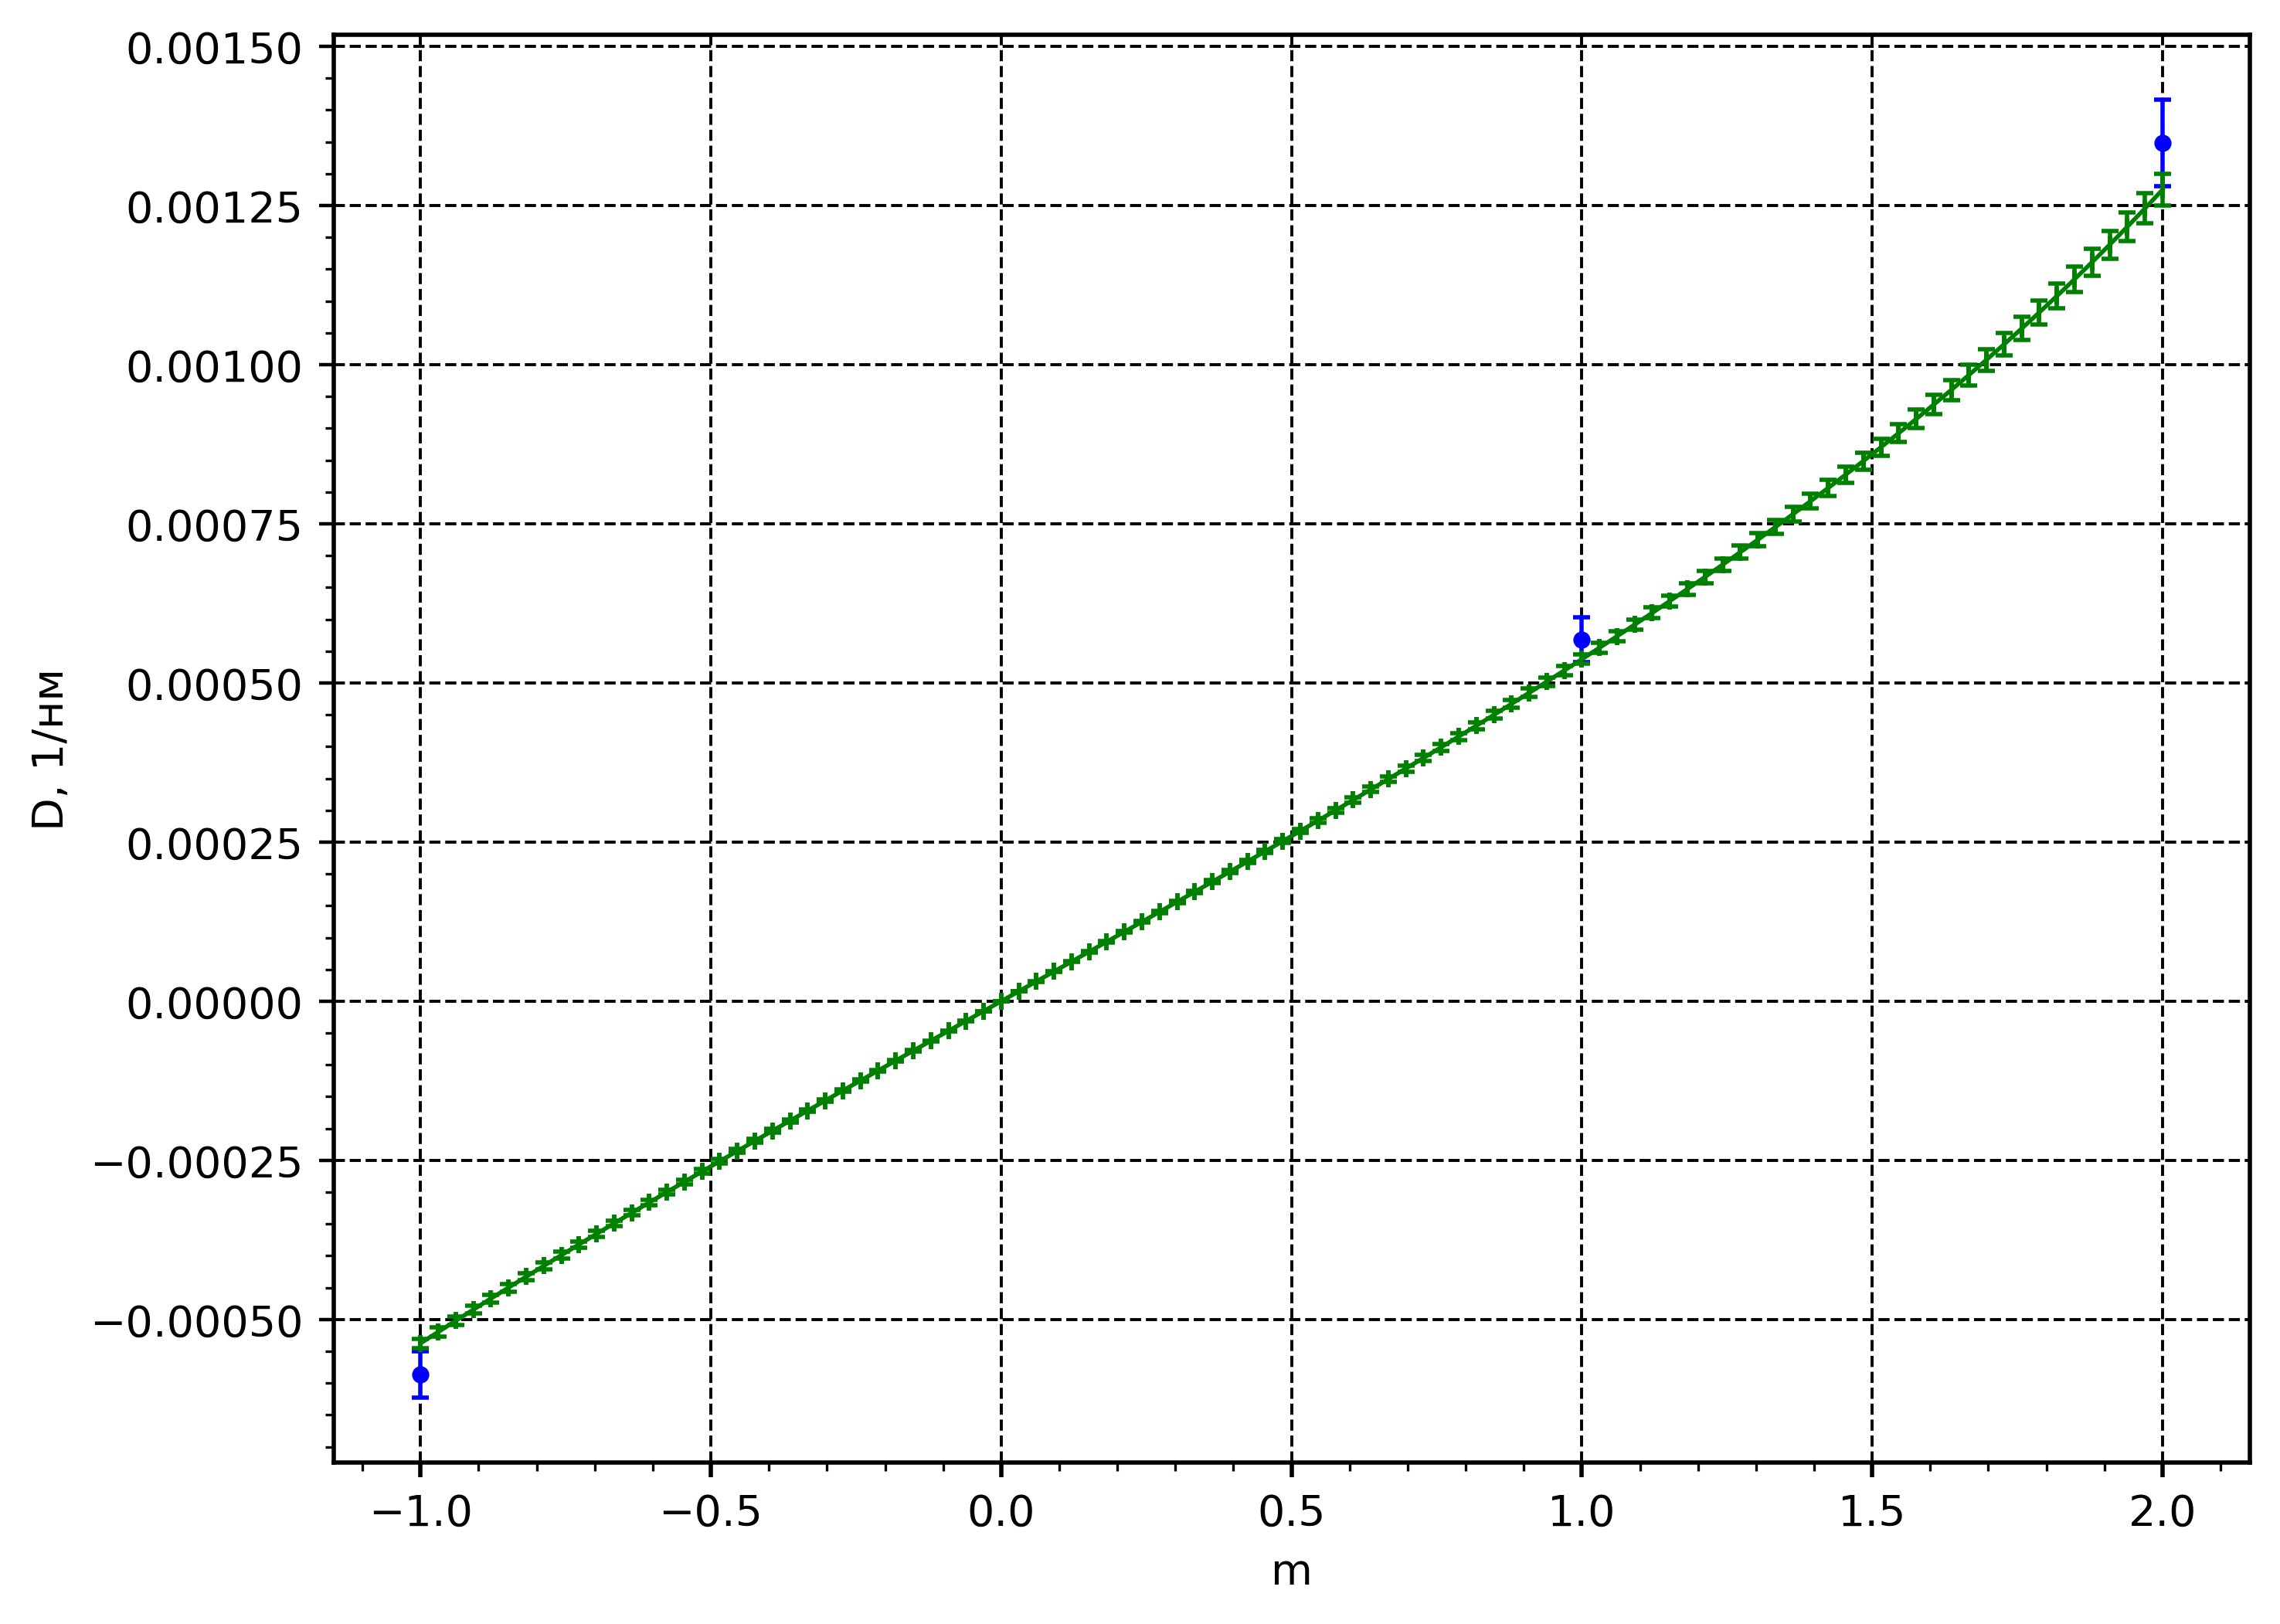

In [78]:
p2 = Plot(xl="m", yl="D")
la2 = Array([uf(578, 1, "nm") for i in range(100)])
x2 = Array(np.linspace(-1, 2, 100))
kkk = Array([kk for i in range(100)])
y2 = x2 / mm.sqrt(kkk ** 2 - x2 ** 2 * la2 ** 2)
p2.plot([-1, 1, 2], Array.concat(j_1.to("nm**-1"), j1.to("nm**-1"), j2.to("nm**-1")), fmt='.')
p2.plot(x2, y2)
p2.save("../img/p2.png")

# Texify primary data

In [3]:
totex(data, file="../tex/table1.tex")

# Add values

In [4]:
r_hg = uf(13550, 1, "kg/m**3")
r_w = uf(1000, 1, "kg/m**3")
dh = uf(8.4, 0.0025, "cm")
g = const.g
r_hg, r_w, g, dh

(13550.0+/-1.0 <Unit('kilogram / meter ** 3')>,
 1000.0+/-1.0 <Unit('kilogram / meter ** 3')>,
 9.8154+/-0.0001 <Unit('meter / second ** 2')>,
 8.4+/-0.0025 <Unit('centimeter')>)

# Compute

In [6]:
data["p"] = ((data["h1"] - data["h2"]) * r_hg * g - r_w * g * dh).ito(u.Pa)
data["1/T"] = data["T"] ** -1
data["lnp"] = mm.log(data["p"].m)
data.df.head(5)

,T,h1,h2,p,1/T,lnp
0,293.00+/-0.05 kelvin,5.1900+/-0.0025 centimeter,2.5800+/-0.0025 centimeter,2647+/-5 pascal,0.0034130+/-0.0000006 / kelvin,7.8811+/-0.0018 dimensionless
1,295.00+/-0.05 kelvin,5.3000+/-0.0025 centimeter,2.5000+/-0.0025 centimeter,2899+/-5 pascal,0.0033898+/-0.0000006 / kelvin,7.9723+/-0.0017 dimensionless
2,296.00+/-0.05 kelvin,5.3450+/-0.0025 centimeter,2.4400+/-0.0025 centimeter,3039+/-5 pascal,0.0033784+/-0.0000006 / kelvin,8.0193+/-0.0016 dimensionless
3,297.00+/-0.05 kelvin,5.4200+/-0.0025 centimeter,2.3600+/-0.0025 centimeter,3245+/-5 pascal,0.0033670+/-0.0000006 / kelvin,8.0850+/-0.0015 dimensionless
4,298.00+/-0.05 kelvin,5.5000+/-0.0025 centimeter,2.2950+/-0.0025 centimeter,3438+/-5 pascal,0.0033557+/-0.0000006 / kelvin,8.1427+/-0.0014 dimensionless


# Plot

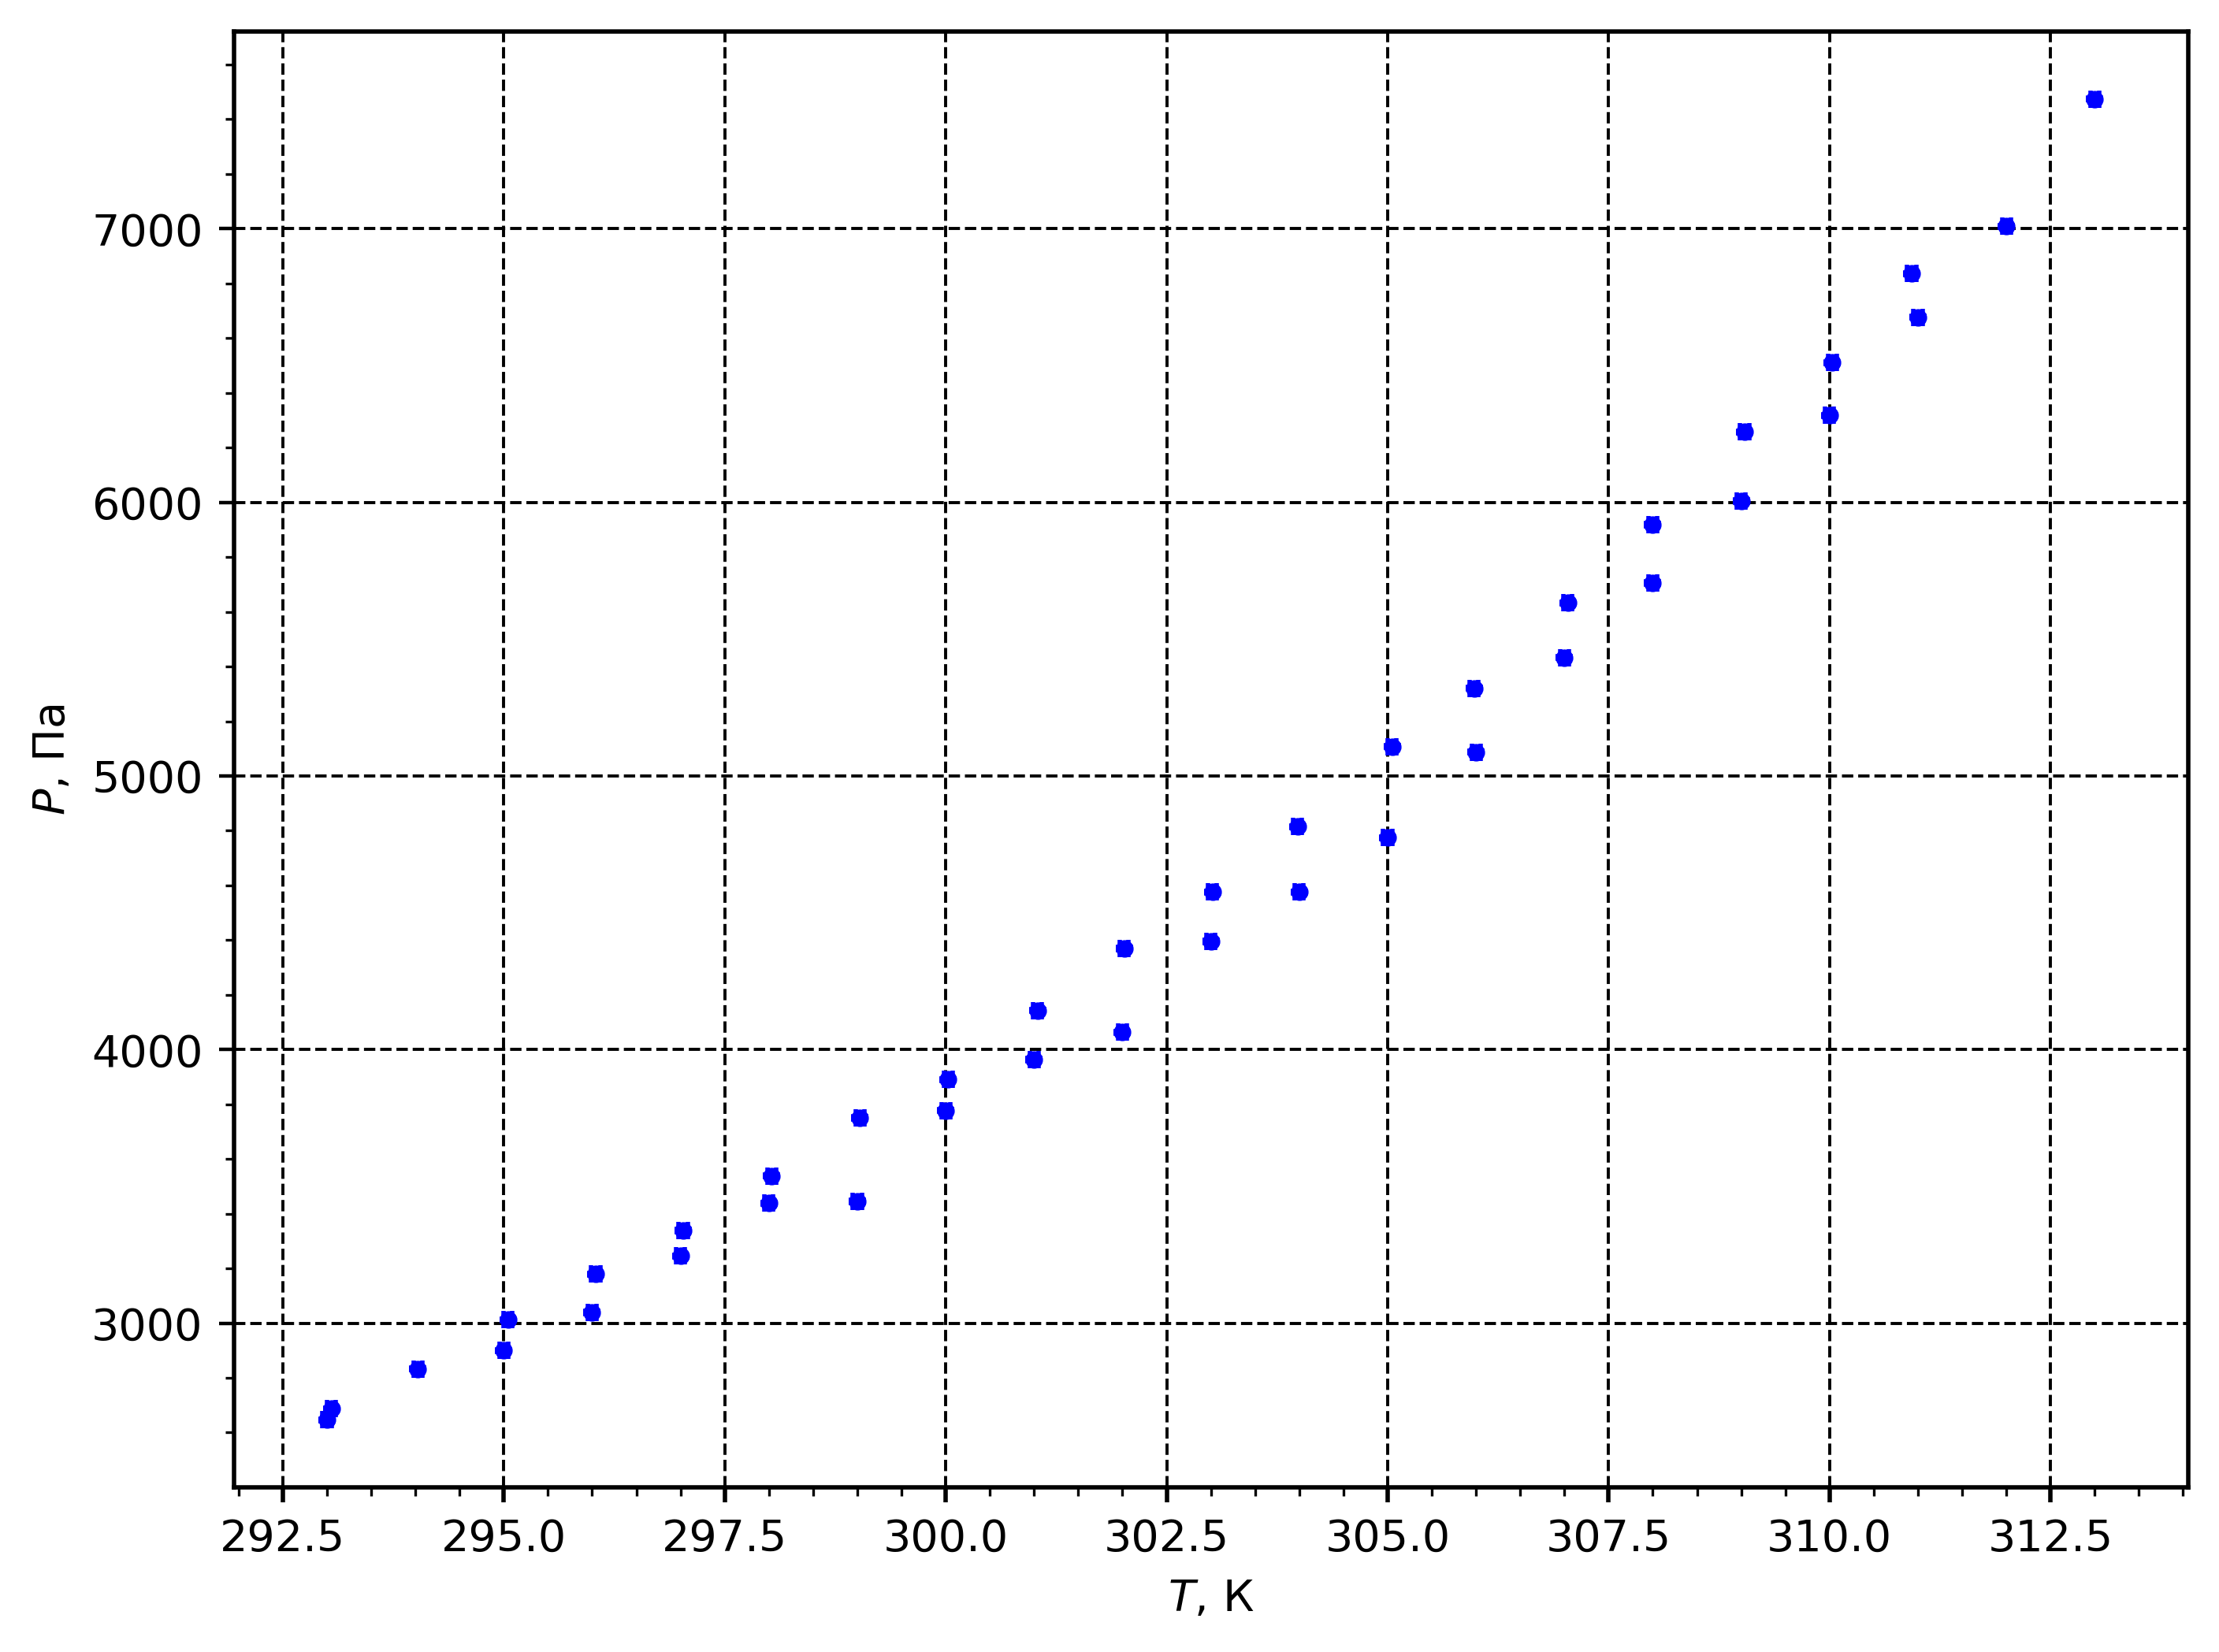

In [7]:
p1 = Plot(yl="$P$", xl="$T$")
p1.plot(data["T"], data["p"], fmt=".")

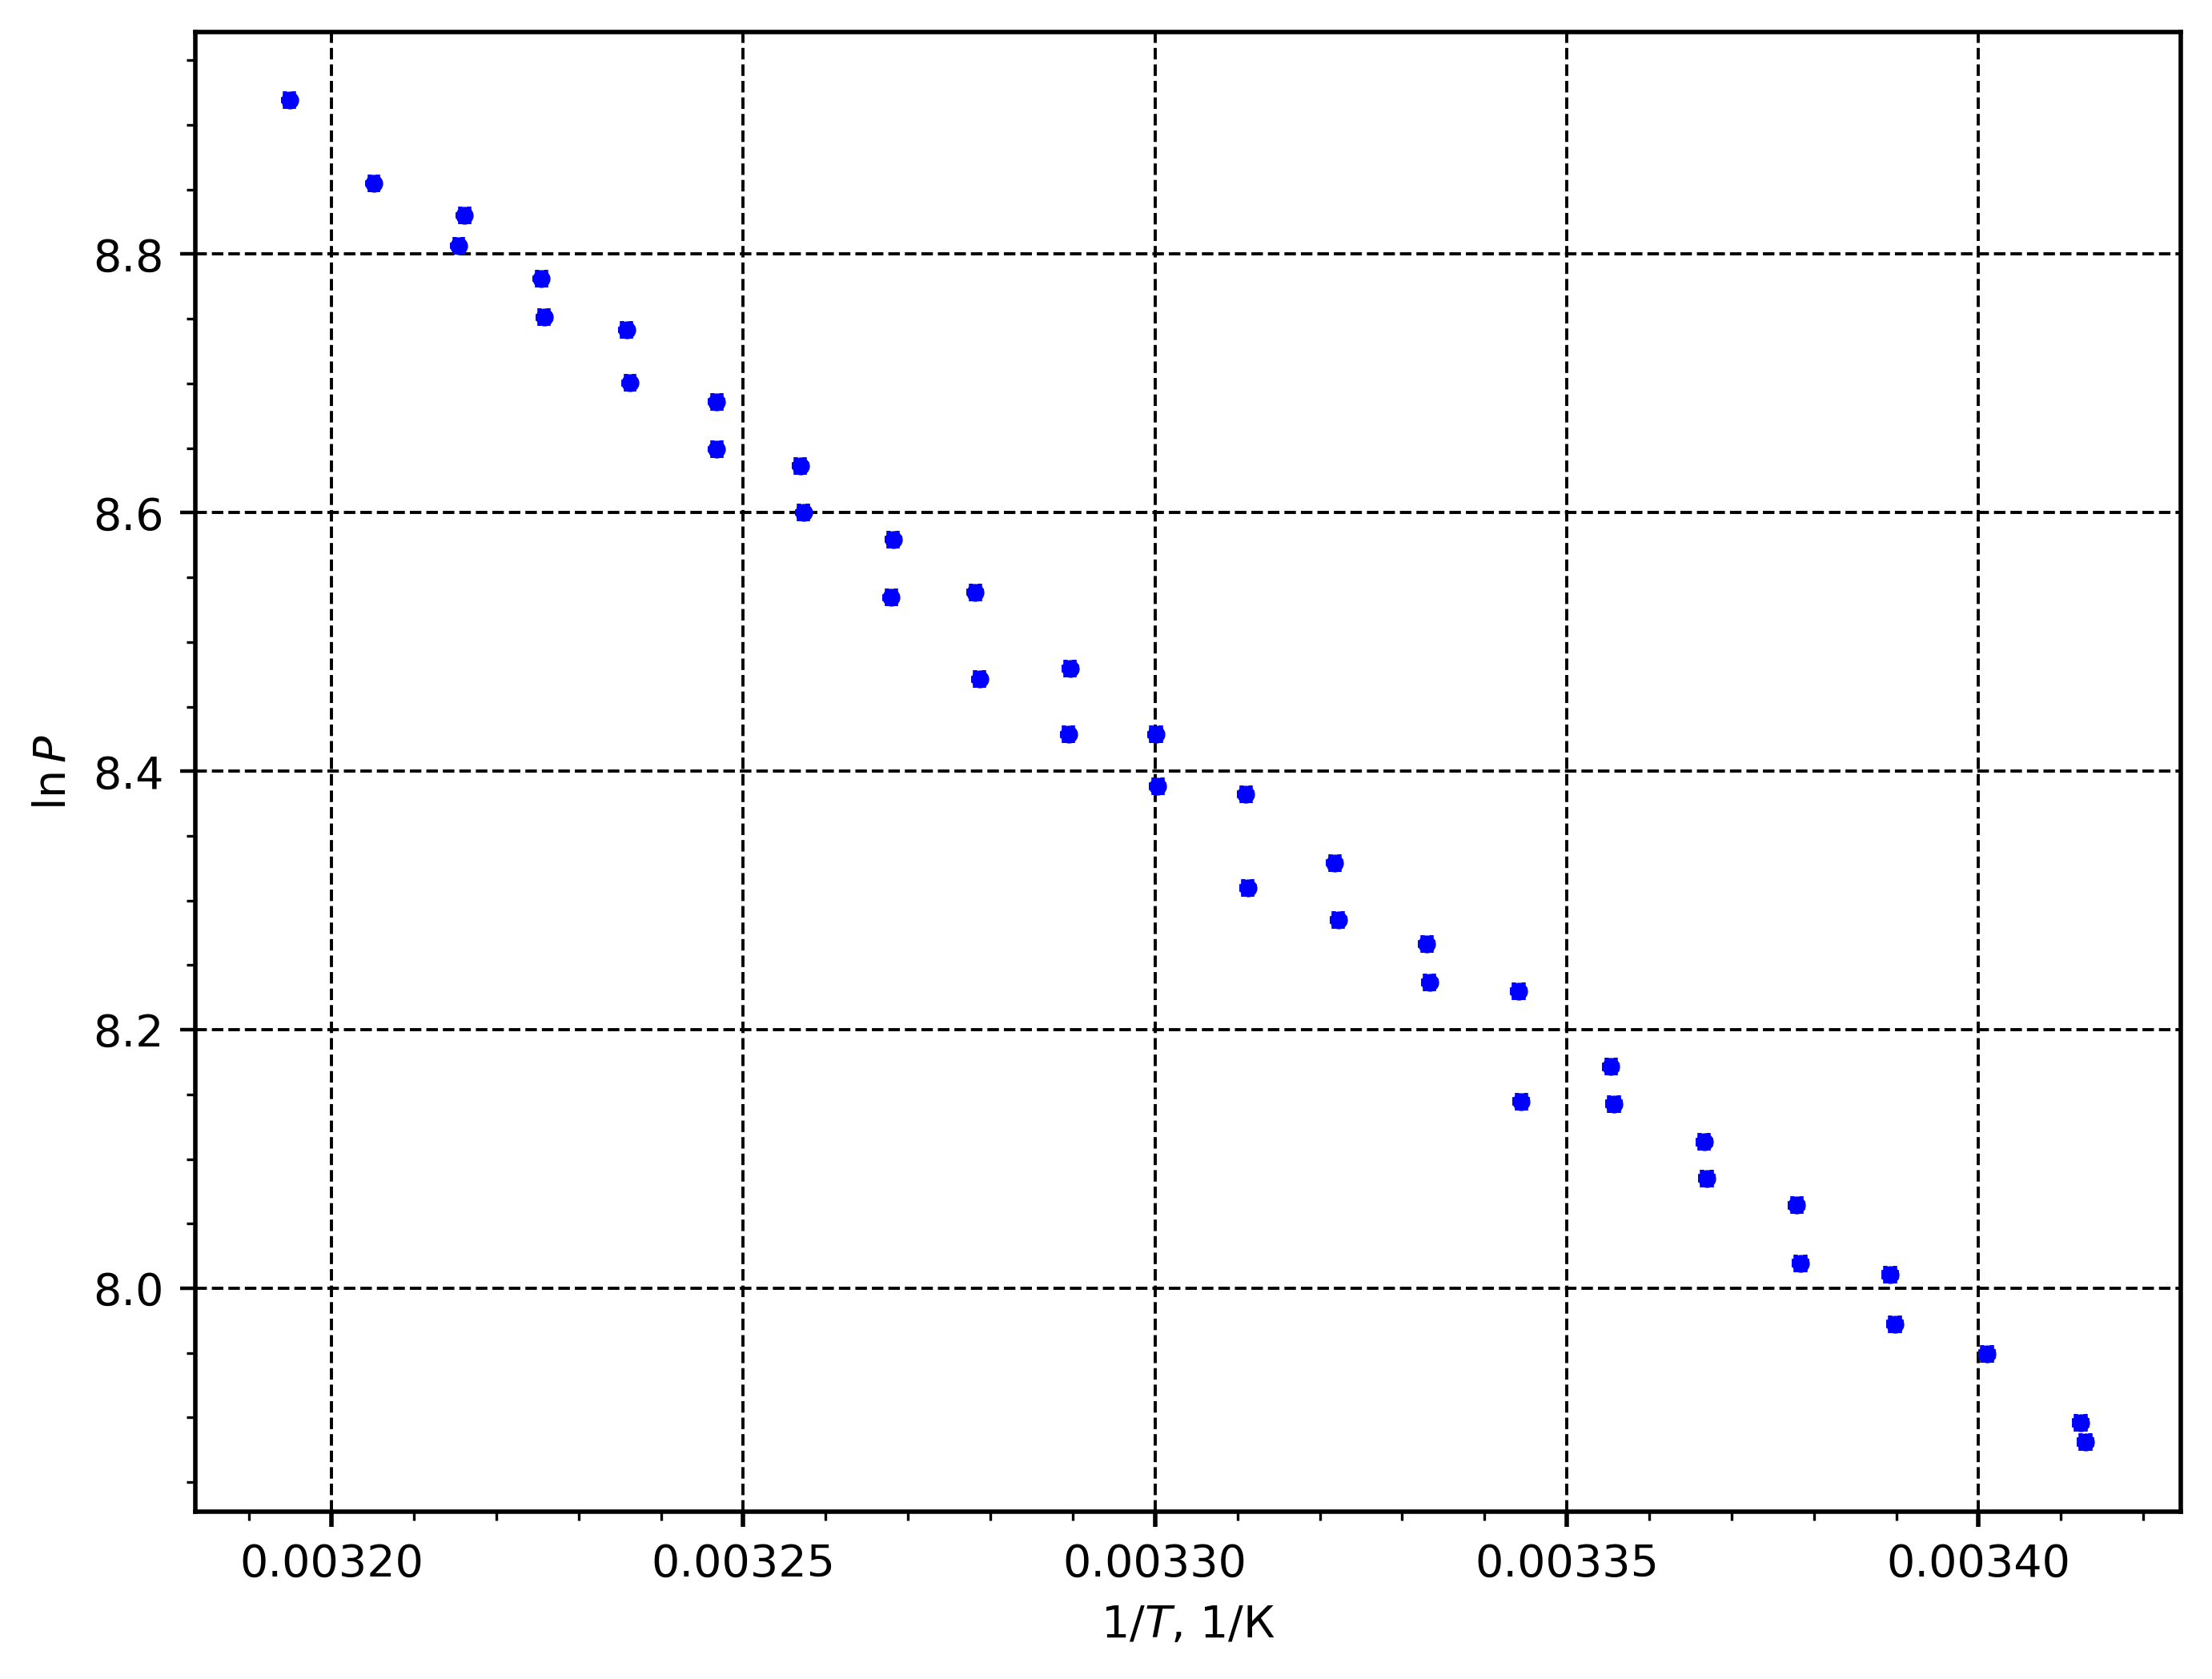

In [8]:
p2 = Plot(yl="$\\ln P$", xl="$1/T$")
p2.plot(data["1/T"], data["lnp"], fmt=".")

# Linear fit

In [9]:
k1, b1 = lf.chi2(data["T"], data["p"])
k2, b2 = lf.chi2(data["1/T"], data["lnp"])
print(f"k1 = {k1}\nk2 = {k2}")
print(f"b1 = {b1}\nb2 = {b2}")

k1 = 234+/-6 pascal / kelvin
k2 = (-4.76+/-0.06)e+03 kelvin
b1 = (-6.61+/-0.18)e+04 pascal
b2 = 24.13+/-0.20 dimensionless


# Plot lines and save

In [10]:
p1.line(k1, b1, color="black")
p1.save("../img/plot1.png")

In [11]:
p2.line(k2, b2, color="black")
p2.save("../img/plot2.png")

# Result

In [12]:
L1 = const.R * data["T"].mean() ** 2 / data["p"].mean() * k1
L2 = -const.R * k2
print(f"L1 = {L1}\nL2 = {L2}")

L1 = (3.86+/-0.10)e+04 joule / mole
L2 = (3.96+/-0.05)e+04 joule / mole


In [13]:
totex(L1)
totex(L2)

\left(38{,}6 \pm 1{,}0\right)\cdot 10^{3}\;\text{Дж} / \text{моль}
39600 \pm 500\;\text{Дж} / \text{моль}


# Texify intermediate data

In [15]:
totex(data, file="../tex/table2.tex", columns={
    "T": "T",
    "h1": "h_1",
    "h2": "h_2",
    "p": "P",
    "1/T": "T^{-1}",
    "lnp": "\ln P",
})